In [42]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# 1. Load data
file_path = ('/content/modified_synthetic_economic_data.csv')
data = pd.read_csv(file_path)
data

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866
...,...,...,...,...,...
1195,2019,12,3.44,2.83,767.901200
1196,2020,12,2.98,3.62,541.022220
1197,2021,12,3.55,3.49,731.564473
1198,2022,12,3.22,5.31,435.166468


In [44]:
# 2. Basic information about the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1200 non-null   int64  
 1   month              1200 non-null   int64  
 2   interest_rate      1200 non-null   float64
 3   unemployment_rate  1200 non-null   float64
 4   index_price        1200 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 47.0 KB
None
              year        month  interest_rate  unemployment_rate  index_price
count  1200.000000  1200.000000    1200.000000        1200.000000  1200.000000
mean   1973.500000     6.500000       3.040050           5.049392   407.213139
std      28.878105     3.453492       0.983762           1.445544   339.826463
min    1924.000000     1.000000       0.500000           2.000000  -580.090673
25%    1948.750000     3.750000       2.377500           4.037500   176.135386
50%    1973.500000     6.500

In [45]:
ini_data = data.head(16)
ini_data

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866
5,1929,1,2.77,5.06,322.252714
6,1930,1,4.58,3.95,1001.812045
7,1931,1,3.77,4.01,744.303356
8,1932,1,2.53,2.90,478.331309
9,1933,1,3.54,7.62,287.929833


In [46]:
# 3. Cek nilai duplikat dan nilai unik
duplicate_rows = ini_data.duplicated().sum()
print(f'Jumlah nilai duplikat: {duplicate_rows}')

Jumlah nilai duplikat: 0


In [68]:
unique_counts = ini_data.nunique()
unique_counts

,0
year,16
month,1
interest_rate,14
unemployment_rate,16
index_price,16


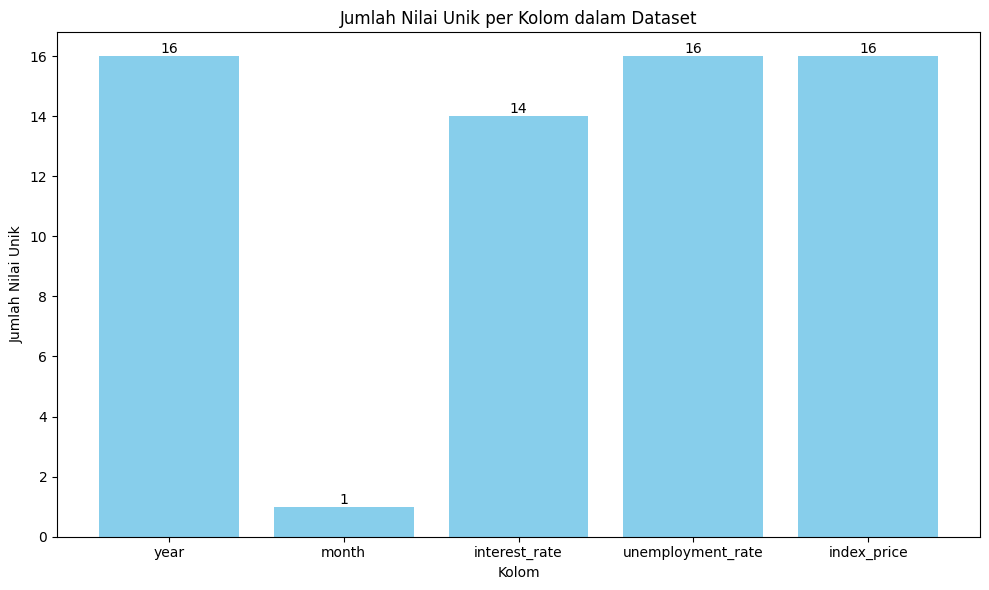

In [72]:
# 4. Visualisasikan jumlah nilai unik
plt.figure(figsize=(10, 6))
plt.bar(unique_counts.index , unique_counts.values, color='skyblue')

plt.xlabel('Kolom')
plt.ylabel('Jumlah Nilai Unik')
plt.title('Jumlah Nilai Unik per Kolom dalam Dataset')

# Menambahkan label di atas batang
for i, count in enumerate(unique_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

# Menampilkan diagram
plt.tight_layout()
plt.show()

In [49]:
# 5. Menemukan null values
null_values = ini_data.isnull().sum()
print(f'Jumlah null values per kolom:\n{null_values[null_values > 0]}')

Jumlah null values per kolom:
Series([], dtype: int64)


In [50]:
# 6. Replace semua null values
ini_data.fillna(ini_data.mean(), inplace=True)

<ipython-input-50-784e46dfac67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini_data.fillna(ini_data.mean(), inplace=True)  # Mengganti dengan rata-rata; sesuaikan metode jika perlu


In [51]:
# 7. Mengetahui tipe data dari dataset
print(f'Tipe data setiap kolom:\n{ini_data.dtypes}')

Tipe data setiap kolom:
year                   int64
month                  int64
interest_rate        float64
unemployment_rate    float64
index_price          float64
dtype: object


In [57]:
# 8. Filter data (contoh filter berdasarkan kolom tertentu)
# Misalkan kita ingin memfilter data dengan nilai kolom 'A' lebih besar dari 10
filtered_data = data[data['interest_rate'] > 4]  # Ganti 'A' dengan nama kolom yang relevan
filtered_data

,year,month,interest_rate,unemployment_rate,index_price
3,1927,1,4.52,5.81,784.797318
6,1930,1,4.58,3.95,1001.812045
20,1944,1,4.47,3.22,1045.532472
31,1955,1,4.85,2.95,1192.220812
47,1971,1,4.06,3.85,851.270955
...,...,...,...,...,...
1164,1988,12,4.02,4.06,816.518338
1165,1989,12,5.44,7.30,911.060247
1166,1990,12,4.38,4.20,913.200743
1181,2005,12,4.39,3.56,984.491532


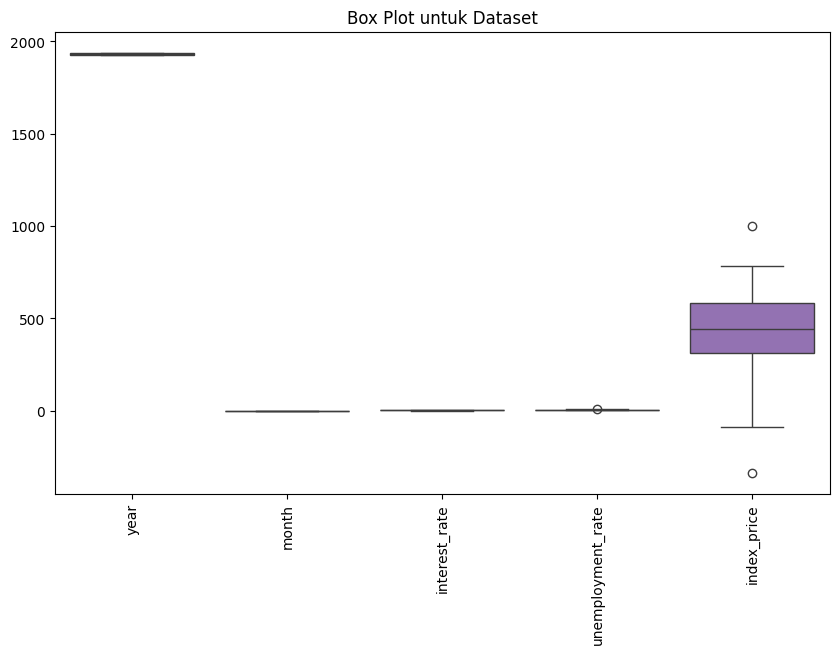

In [70]:
# 9. Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=ini_data)
plt.title('Box Plot untuk Dataset')
plt.xticks(rotation=90)
plt.show()

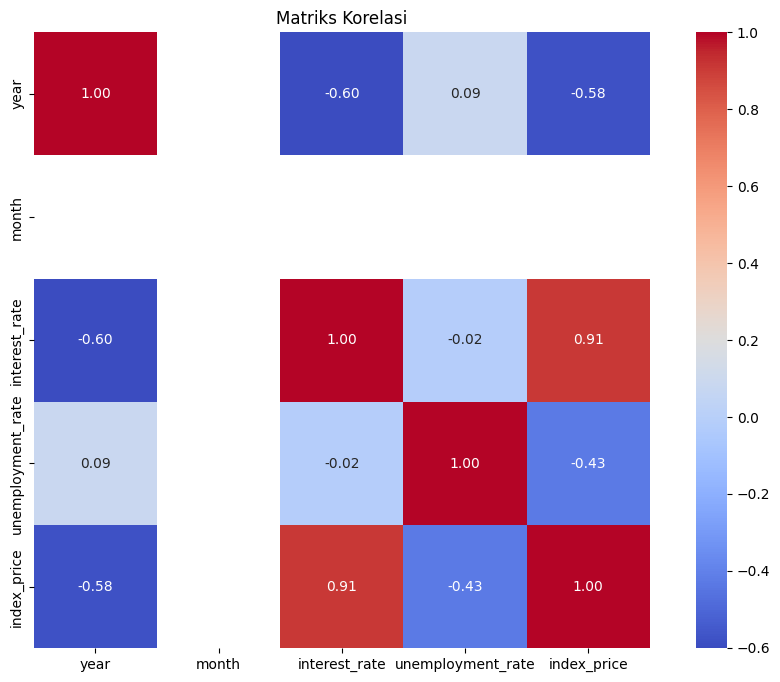

In [54]:
# 10. Correlation
correlation_matrix = ini_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()